<a href="https://colab.research.google.com/github/SuhelAnsari9272/Topic-Modeling-on-News-Articles-/blob/main/Suhel_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re
import nltk
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
import gensim
from wordcloud import WordCloud
import nltk 
nltk.download('wordnet')
from nltk.tokenize import word_tokenize

import nltk 
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
!pip install pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c9c80a9f40b8ae665c6c846266ff677e33ba30e1a4bccdeb7a47151146eea1ff
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=440e0a3981b5ab77a87509fccb49af8581ce7fd1b6ac459aef4cc78c907d57de
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


###Loading dataset

In [ ]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading the data
News=[]
Type=[]

path="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)
      

In [ ]:
#wrinting data to csv format
data={'news':News,'type':Type}
df = pd.DataFrame(data)
df.to_csv('./bbc.csv')

In [ ]:
df= pd.read_csv('bbc.csv')

###Data overview

In [ ]:
df.head()

,Unnamed: 0,news,type
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [ ]:
#Shape of dataframe
df.shape

(2225, 3)

In [ ]:
#descriprtion of object data type
df.describe(include='object')

,news,type
count,2225,2225
unique,2127,5
top,b'MPs issued with Blackberry threat\n\nMPs wil...,sport
freq,2,511


In [ ]:
#removing duplicates 
print(len(df[df['news'].duplicated()]))
df=df.drop_duplicates('news')

98


In [ ]:
#new shape of data frame
df.shape

(2127, 3)

In [ ]:
#dropping the index column of the dataset
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,news,type
0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,b'India\'s rupee hits five-year high\n\nIndia\...,business


* The dataset consist of 2225 rows and 3 columns (unique_id,news,type)
* The news articles are of 5 unique types.
* The dataset has no null values but it has 98 duplicate news articles.
* The new shape of the dataset is 2127 rows with 3 columns after removal of duplicates

###Feature engineering

In [ ]:
#length of the news
df['length']=df.news.str.len()

In [ ]:
#function to count the number of words in the article
def word_count(article):
  return len(article.split(" "))

In [ ]:
# Getting word count of each article
df['word_count']=df['news'].apply(word_count)

In [ ]:
#Description of these new variable
df.describe()

,length,word_count
count,2127.000000,2127.000000
mean,2288.550071,379.444758
std,1393.870309,238.261401
min,512.000000,87.000000
25%,1460.000000,242.000000
50%,1987.000000,327.000000
75%,2825.500000,465.000000
max,25670.000000,4377.000000


In [ ]:
#Total number of words present in the whole corpus
Total_words=sum(df['word_count'])
Total_words

807079

In [ ]:
# Percentage of Types of news in the dataset
df['type'].value_counts(normalize=True)*100

sport            23.742360
business         23.648331
politics         18.946874
entertainment    17.348378
tech             16.314057
Name: type, dtype: float64

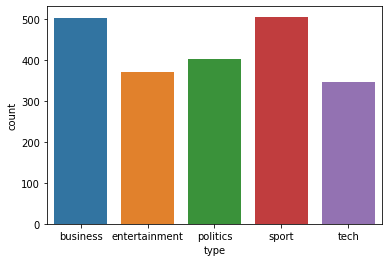

In [ ]:
#Countplot of different types of Articles in the dataset
sns.countplot(df['type'])

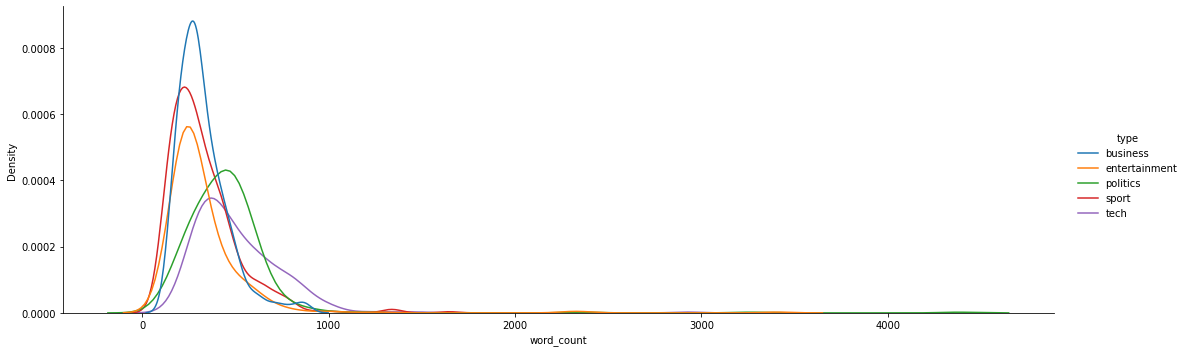

In [ ]:
#distribution of length of different news type
sns.displot(df, x="word_count", hue="type", kind="kde",height=5,aspect =3 )

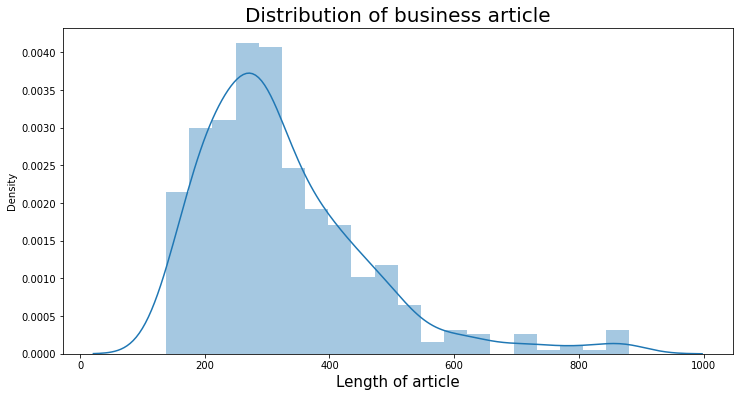

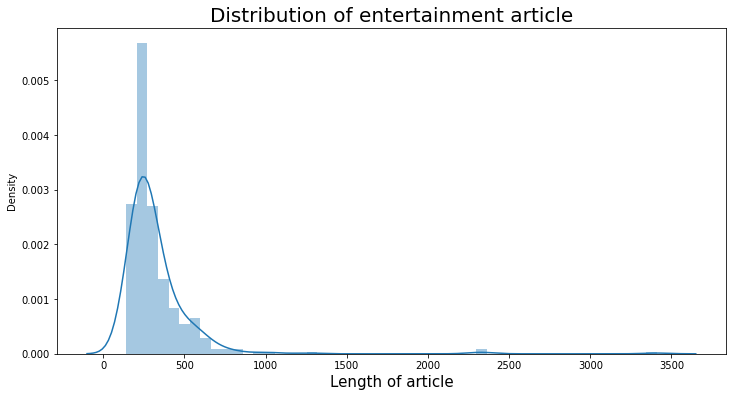

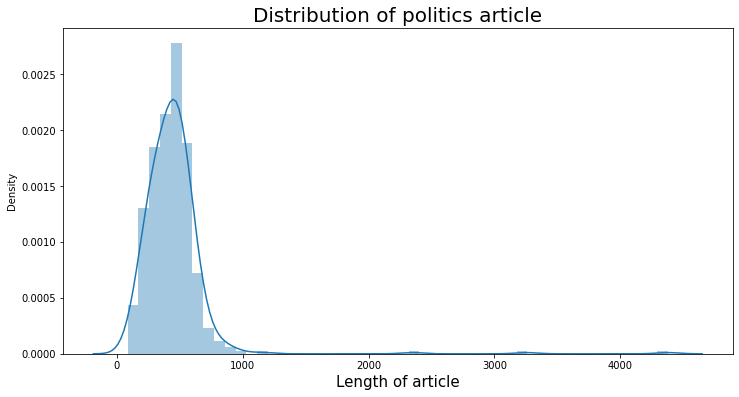

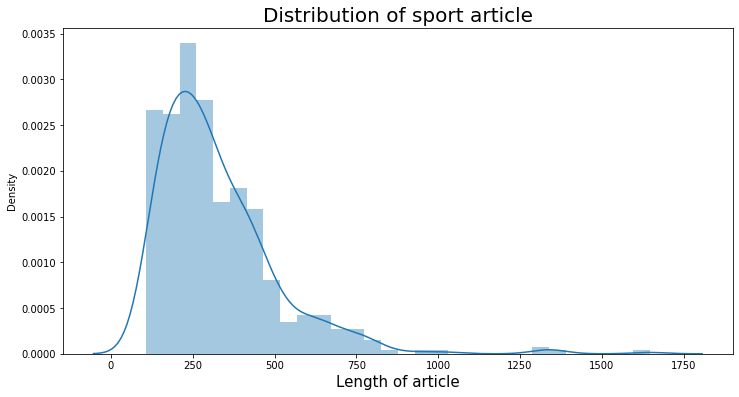

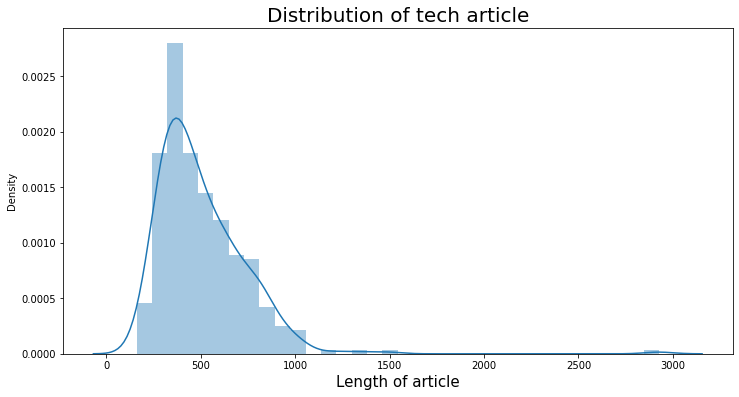

In [ ]:
#Distribution of different types of articles
types_article=list(df['type'].unique())
for article in types_article:
  df_article=df[df['type']==article]
  plt.figure(figsize=(12,6))
  fig=sns.distplot(x=df_article['word_count'])
  fig.set_title(f'Distribution of {article} article',size=20)
  fig.set_xlabel('Length of article',size=15)

* Business has most aritlces of shorter length.
* Politics and Entertainment articles are more bigger than any other topic.
* The curve shows most of the articles are of shorter length of 500 approx.


###Data preprocessing

In [ ]:
#copying the original data
corpus_df=df.copy(deep=True)

In [ ]:
#First observation
obs=df['news'][0]
obs

'b"Peugeot deal boosts Mitsubishi\\n\\nStruggling Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV).\\n\\nThe two firms signed a Memorandum of Understanding, and say they expect to seal a final agreement by Spring 2005. The alliance comes as a badly-needed boost for loss-making Mitsubishi, after several profit warnings and poor sales. The SUVs will be built in Japan using Peugeot\'s diesel engines and sold mainly in the European market. Falling sales have left Mitsubishi Motors with underused capacity, and the production deal with Peugeot gives it a chance to utilise some of it.\\n\\nIn January, Mitsubishi Motors issued its third profits warning in nine months, and cut its sales forecasts for the year to March 2005. Its sales have slid 41% in the past year, catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles. As a result, the J

* The above article has <b>punctuation, numericals , special characters and new line character </b>.  These are needed to be cleaned for further processing

In [ ]:
#Removal of newline character
obs=obs.replace('\\n'," ")

#Removal of all the punctuations,special character, numbers 
obs=re.sub("[^a-zA-Z]"," ",obs)

#conversion to lower case
obs=obs.lower()

#removal of additional whitespace
obs=re.sub(r'\s+'," ",obs)

#After basic cleaning
obs


'b peugeot deal boosts mitsubishi struggling japanese car maker mitsubishi motors has struck a deal to supply french car maker peugeot with sports utility vehicles suv the two firms signed a memorandum of understanding and say they expect to seal a final agreement by spring the alliance comes as a badly needed boost for loss making mitsubishi after several profit warnings and poor sales the suvs will be built in japan using peugeot s diesel engines and sold mainly in the european market falling sales have left mitsubishi motors with underused capacity and the production deal with peugeot gives it a chance to utilise some of it in january mitsubishi motors issued its third profits warning in nine months and cut its sales forecasts for the year to march its sales have slid in the past year catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles as a result the japanese car maker has sought a series of financial ba

A basic cleaning has been performed . Now Applying this one whole data

In [ ]:
#Function to perform cleaning or preprocessing of articles
def cleaning(text):
  cleaned_text = text.replace('\\n'," ")    # removal of new line symbol \n 
  
  cleaned_text = re.sub("[^a-zA-Z]"," ",cleaned_text)                 # removal of all the punctuations,special character, numbers
  
  cleaned_text = cleaned_text.lower()                                 # converting to lower case 
  
  cleaned_text = re.sub(r'\s+'," ",cleaned_text)                      # Removal of additional white space
  
  return cleaned_text

In [ ]:
#Applying basic cleaning to whole data
corpus_df['news']=corpus_df['news'].apply(cleaning)

In [ ]:
#Word Count after basic cleaning
corpus_df['wc_after_cleaning']=corpus_df['news'].apply(word_count)

In [ ]:
corpus_df.head()

,news,type,length,word_count,wc_after_cleaning
0,b peugeot deal boosts mitsubishi struggling ja...,business,1846,296,301
1,b call centre users lose patience customers tr...,business,3882,653,643
2,b china keeps tight rein on credit china s eff...,business,1404,245,241
3,b us trade gap hits record in the gap between ...,business,1984,324,326
4,b india s rupee hits five year high india s ru...,business,1023,172,183


* Visulization of data - unigram / bigram  top 10

In [ ]:
#Lemmatization 
import nltk 
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
def lemmatize_word(text):
    word_list = word_tokenize(text)
    lemma = WordNetLemmatizer()
    word_list = [lemma.lemmatize(word) for word in word_list]
    # list to sentence
    return ' '.join(word_list)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
#Applying lemmatization
corpus_df['news']=corpus_df['news'].apply(lemmatize_word)

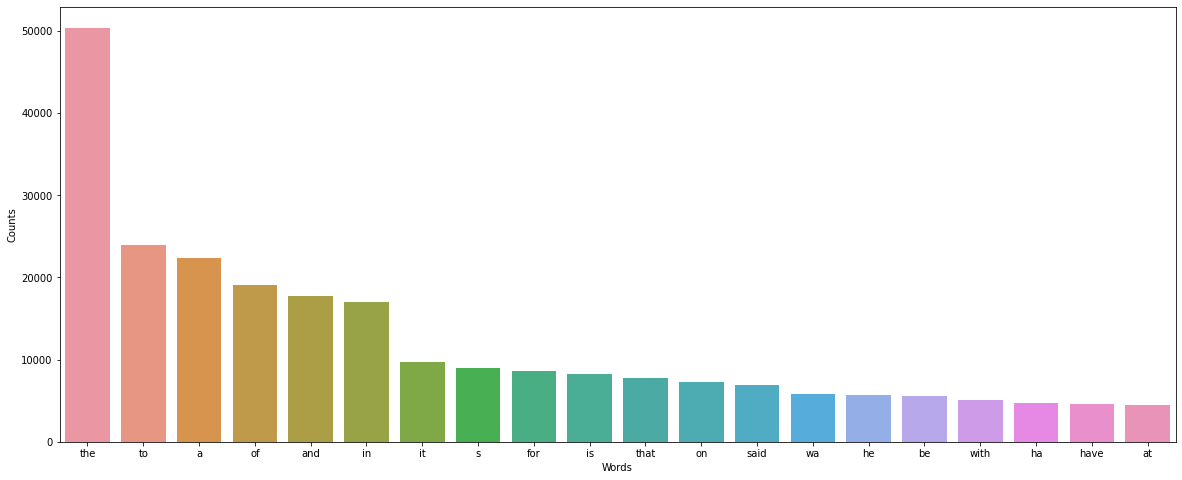

In [ ]:
#Top 20 most frequent words in the corpus
Top_20_freq = pd.Series(' '.join(corpus_df['news']).split()).value_counts()[:20]
top20=pd.DataFrame()
top20['Words']= list(Top_20_freq.index)
top20['Counts']=list(Top_20_freq.values)

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x = 'Words',y = 'Counts',data = top20,ax=ax)

* The graph shows that stopwords are most frequent in the whole dataset. So these stopwords need to be removed.
*Also the short length (< 3) words are most frequent.

In [ ]:
#Removing short length words ( length less than 3)
def short_length(text):
  return (' '.join([wds for wds in text.split() if len(wds)>2]))

corpus_df['news']=corpus_df['news'].apply(short_length)


In [ ]:
corpus_df['wc_rem_short_len']=corpus_df['news'].apply(word_count)

In [ ]:
corpus_df.head()

,news,type,length,word_count,wc_after_cleaning,wc_rem_short_len
0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301,228
1,call centre user lose patience customer trying...,business,3882,653,643,516
2,china keep tight rein credit china effort stop...,business,1404,245,241,180
3,trade gap hit record the gap between export an...,business,1984,324,326,241
4,india rupee hit five year high india rupee hit...,business,1023,172,183,130


Removing Stopwords

In [ ]:
#Stopwords
# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))

# list of stopwords from spacy
sp = spacy.load('en_core_web_sm')
stopwords_spacy = list(sp.Defaults.stop_words)

# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)

# all unique stop words
all_stopwords = list(set(all_stopwords))

def stop_words(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in all_stopwords]
  return " ".join(text)

In [ ]:
len(all_stopwords)

413

In [ ]:
#Removal of Stopwords
corpus_df['news']=corpus_df['news'].apply(stop_words)

In [ ]:
corpus_df['after_stop']=corpus_df['news'].apply(word_count)

In [ ]:
corpus_df.head()

,news,type,length,word_count,wc_after_cleaning,wc_rem_short_len,after_stop
0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301,228,163
1,centre user lose patience customer trying cent...,business,3882,653,643,516,288
2,china tight rein credit china effort stop econ...,business,1404,245,241,180,119
3,trade gap hit record gap export import hit tim...,business,1984,324,326,241,157
4,india rupee hit year high india rupee hit year...,business,1023,172,183,130,84


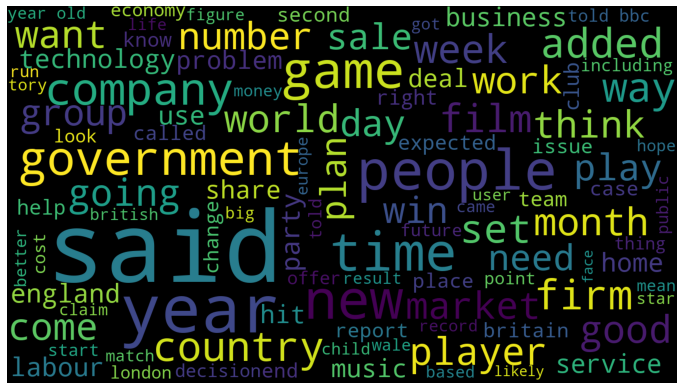

In [ ]:
# Cloud Words plot for displaying most frequent words in the data 
freq_words = ','.join(list(corpus_df['news'].values))

wordcloud = WordCloud(width=1366, height=768, random_state=21,max_words=100 ,max_font_size=200,background_color='black').generate(freq_words)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [ ]:
#removal of non-contextual words
add_stopwords= ['said','told','called','use','know','came','based','way','added','including','got']

In [ ]:
def remove_add_stopwords(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in add_stopwords]
  return " ".join(text)


In [ ]:
#Removing addtional stopwords according to use case
corpus_df['news']=corpus_df['news'].apply(remove_add_stopwords)

In [ ]:
corpus_df['wc_rem_stopword']=corpus_df['news'].apply(word_count)

In [ ]:
corpus_df.head()

,news,type,length,word_count,wc_after_cleaning,wc_rem_short_len,after_stop,wc_rem_stopword
0,peugeot deal boost mitsubishi struggling japan...,business,1846,296,301,228,163,162
1,centre user lose patience customer trying cent...,business,3882,653,643,516,288,285
2,china tight rein credit china effort stop econ...,business,1404,245,241,180,119,119
3,trade gap hit record gap export import hit tim...,business,1984,324,326,241,157,155
4,india rupee hit year high india rupee hit year...,business,1023,172,183,130,84,82


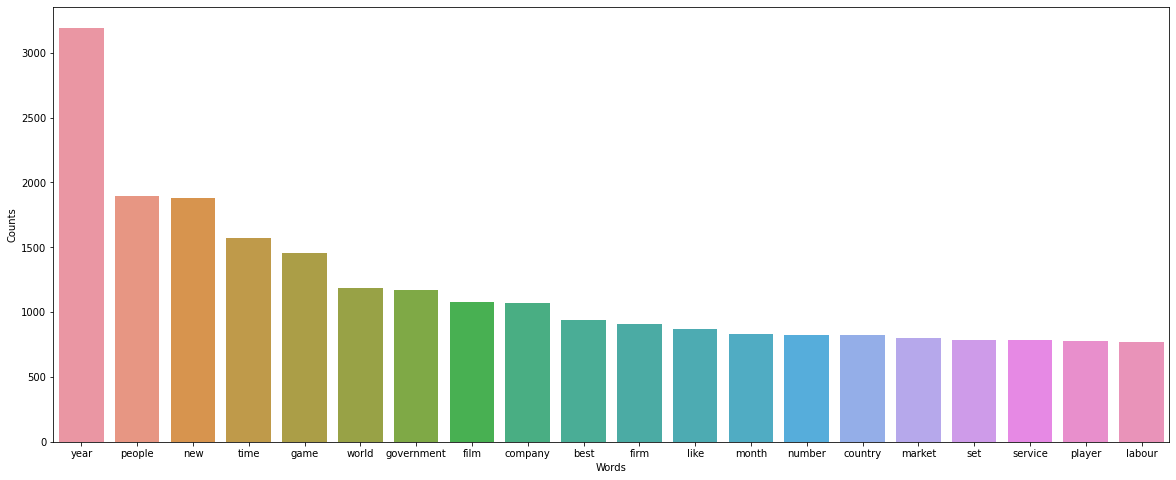

In [ ]:
#Top 20 most frequent words in the corpus After stopword removal
Top_20_freq = pd.Series(' '.join(corpus_df['news']).split()).value_counts()[:20]
top20=pd.DataFrame()
top20['Words']= list(Top_20_freq.index)
top20['Counts']=list(Top_20_freq.values)

fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x = 'Words',y = 'Counts',data = top20,ax=ax)

In [ ]:
#Data reduction 
after_preprocess=corpus_df['wc_rem_stopword'].sum()
after_preprocess

data_reduce=(after_preprocess/Total_words)*100
data_reduce

48.56823185834349

* Almost 50% of unneccessary data has been removed.

####LDA

In [ ]:
#Tf-Idf vectoriser
vectorizer = TfidfVectorizer(min_df = 0.03)
document_term_matrix = vectorizer.fit_transform(corpus_df['news'])

In [ ]:
#Shape of document term matrix
document_term_matrix.shape

(2127, 947)

In [ ]:

# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {'n_components' : list(range(5,10))}

# LDA model
lda_model = GridSearchCV(LatentDirichletAllocation(),param_grid=grid_params)
lda_model.fit(document_term_matrix)

# Best LDA model
best_lda_model = lda_model.best_estimator_

print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -24108.87030521369
LDA model Perplexity on train data 1437.2903204805802


In [ ]:
# LDA model fitting for best parameter
lda= LatentDirichletAllocation(n_components=5,max_iter=1000,random_state=42, n_jobs=-1)
lda.fit(document_term_matrix)

LatentDirichletAllocation(max_iter=1000, n_components=5, n_jobs=-1,
                          random_state=42)

In [ ]:
# LDA model
top_lda=lda.fit_transform(document_term_matrix)

print(top_lda.shape)
print(top_lda)

(2127, 5)
[[0.02777719 0.88873094 0.0274679  0.0277795  0.02824448]
 [0.02737138 0.74745721 0.02634086 0.1710435  0.02778705]
 [0.02948842 0.8823183  0.0290104  0.02963842 0.02954446]
 ...
 [0.23362634 0.03110627 0.02993047 0.67361597 0.03172095]
 [0.02557599 0.4180475  0.02438306 0.50566167 0.02633178]
 [0.76169287 0.02967374 0.02841475 0.15076188 0.02945675]]


In [ ]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(top_lda[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  2.7777193633441675 %
Topic  1 :  88.87309361304402 %
Topic  2 :  2.7467896305209147 %
Topic  3 :  2.777949565956113 %
Topic  4 :  2.824447827134789 %


* The first document is more belonging to the Topic 1.

In [ ]:
import pyLDAvis.sklearn
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  29.997639
3       51.163364 -159.968018       2        1  22.710949
2      -73.144554   21.523815       3        1  22.286917
0      -66.410133 -110.606438       4        1  22.274196
4       54.417324   12.443444       5        1   2.730299, topic_info=           Term       Freq      Total Category  logprob  loglift
328        film  60.000000  60.000000  Default  30.0000  30.0000
461      labour  37.000000  37.000000  Default  29.0000  29.0000
274    election  35.000000  35.000000  Default  28.0000  28.0000
355        game  63.000000  63.000000  Default  27.0000  27.0000
614       party  36.000000  36.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
101      bought   0.386846  10.439610   Topic5  -6.8525   0.3054
670     product   0.386838  16.091025   Topic5  -6.8525  -0.1273
119     capital   0.386833   8.157981   Topic5  -6.8525   0.5520
403      honour   0.386830   8.872185   Topic5  -6.8525   0.4681
596  opposition   0.386827   8.502804   Topic5  -6.8525   0.5106

[272 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
9         1  0.924626     actor
10        1  0.891974   actress
30        1  0.967618     album
34        1  0.152403  ambition
34        2  0.304806  ambition
...     ...       ...       ...
939       4  0.208745     world
944       1  0.308561      year
944       2  0.130545      year
944       3  0.249222      year
944       4  0.308561      year

[580 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1, 5])

In [ ]:
# most important words for each topic
vocab = vectorizer.get_feature_names()

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=800, height=500).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

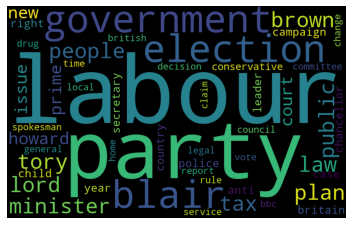

In [ ]:
#Word Cloud for each topic
draw_word_cloud(0)

* Politics

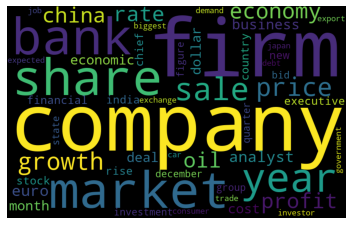

In [ ]:
draw_word_cloud(1)

* Business

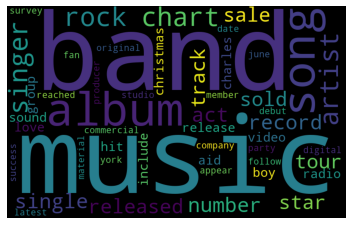

In [ ]:
draw_word_cloud(2)

* Entertainment

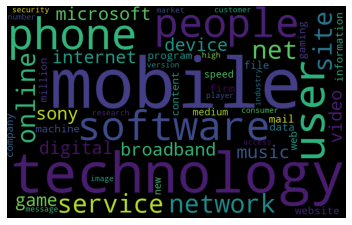

In [ ]:
draw_word_cloud(3)

* Technology

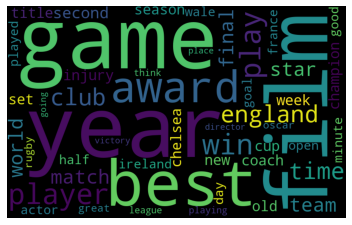

In [ ]:
draw_word_cloud(4)

* Sports

####LSA

In [ ]:
# create svd instance
svd_model = TruncatedSVD(n_components=5,random_state=42,algorithm='randomized')

# fit model to data
svd_model.fit(document_term_matrix)

tsvd_mat=svd_model.transform(document_term_matrix)

In [ ]:
tsvd_mat.shape

(2127, 5)

In [ ]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)

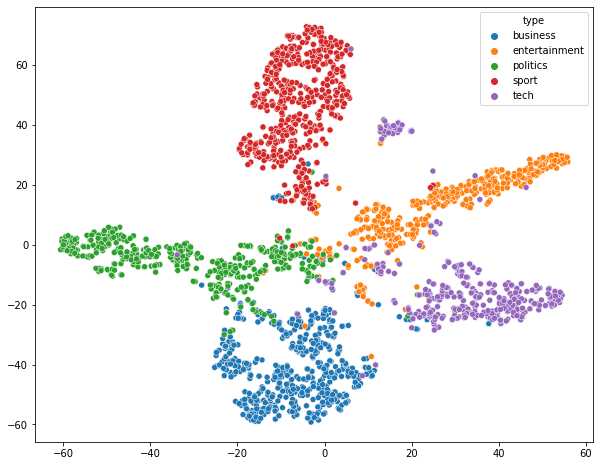

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1],hue=corpus_df['type'])

In [ ]:
#Draw word cloud for each topic
# Generate a word cloud image for given topic
def word_cloud_lsa(index):
  imp_words_topic=""
  comp=svd_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=800, height=500).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

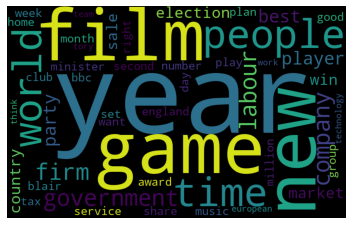

In [ ]:
#Word Cloud for each topic using LSA
word_cloud_lsa(0)

* Sports

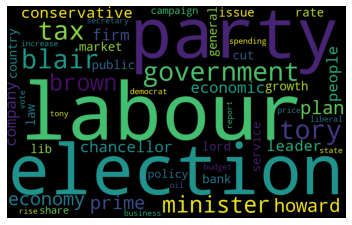

In [ ]:
word_cloud_lsa(1)

* Politics

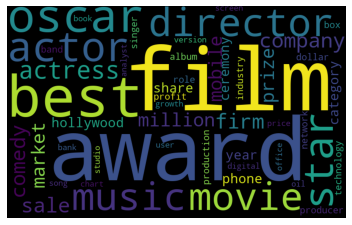

In [ ]:
word_cloud_lsa(2)

* Entertainment

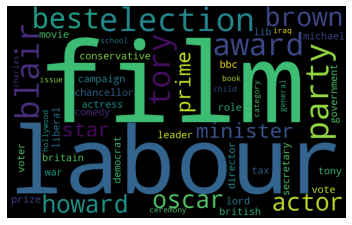

In [ ]:
word_cloud_lsa(3)

* Business ; but not clear

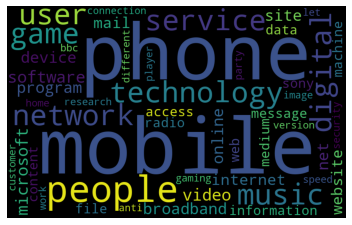

In [ ]:
word_cloud_lsa(4)

* technology

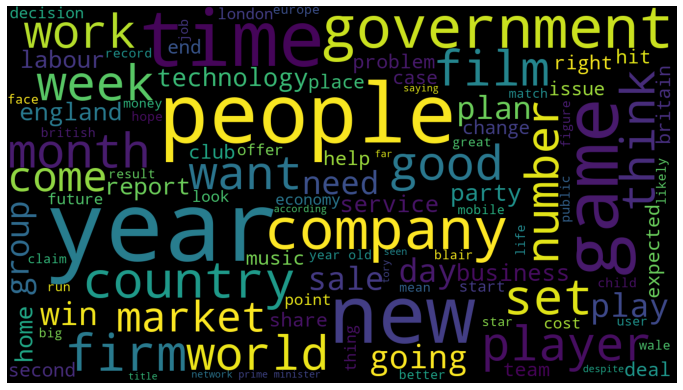

In [ ]:
freq_words = ','.join(list(corpus_df['news'].values))

wordcloud = WordCloud(width=1366, height=768, random_state=21,max_words=100 ,max_font_size=200,background_color='black').generate(freq_words)
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [ ]:
#TRy to add more visualisastion